In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.rename(columns = {'Daily Time Spent on Site': 'time','Daily Internet Usage':'DIU','Ad Topic Line':'ATL'},inplace = True)

In [6]:
data.columns

Index(['time', 'Age', 'Area Income', 'DIU', 'ATL', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

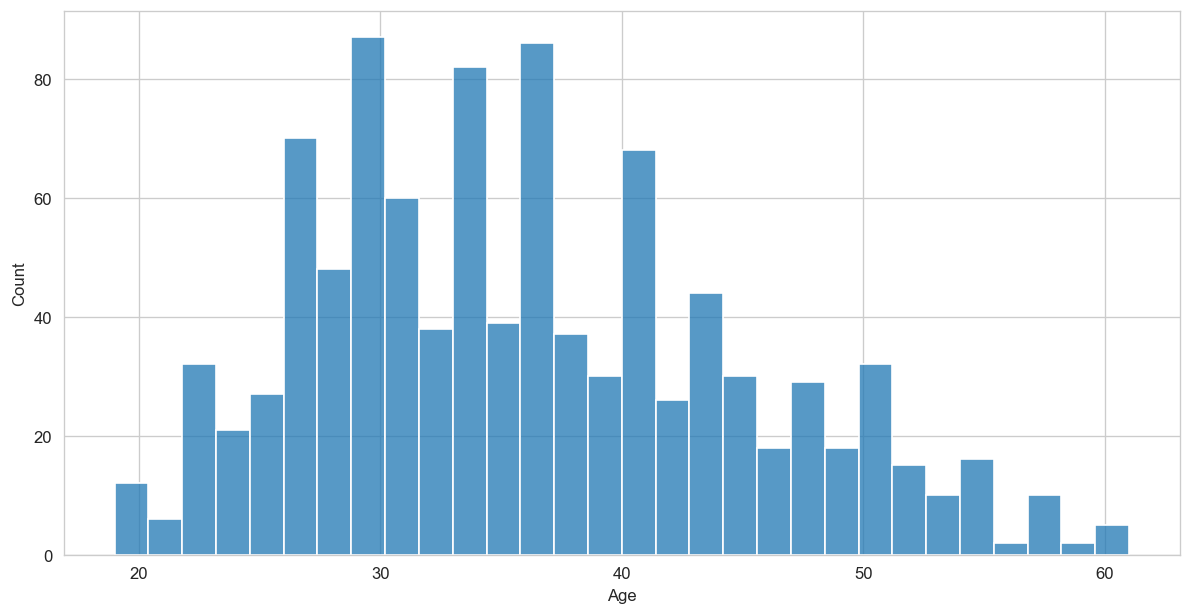

In [7]:
plt.figure(figsize = (12,6),dpi=120)
sns.histplot(data['Age'],bins = 30)
plt.show()

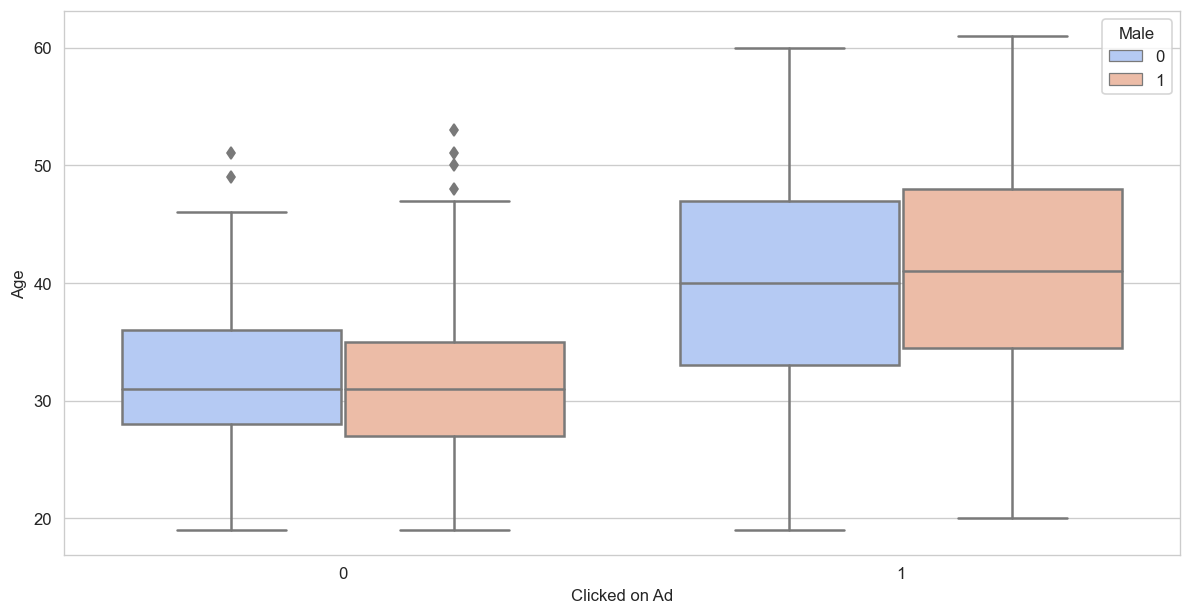

In [8]:
plt.figure(figsize = (12,6),dpi=120)
sns.boxplot(data = data,x='Clicked on Ad',y='Age', hue='Male',palette = 'coolwarm')
plt.show()

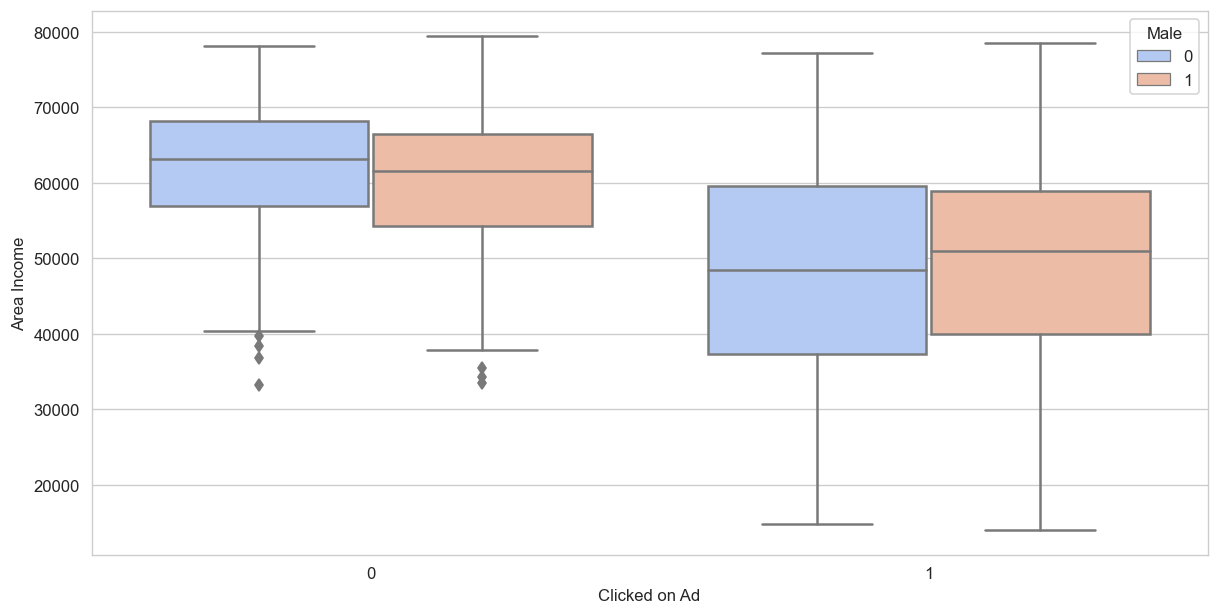

In [9]:
plt.figure(figsize = (12,6),dpi=120)
sns.boxplot(data = data,y='Area Income',x='Clicked on Ad', hue='Male',palette = 'coolwarm')
plt.show()

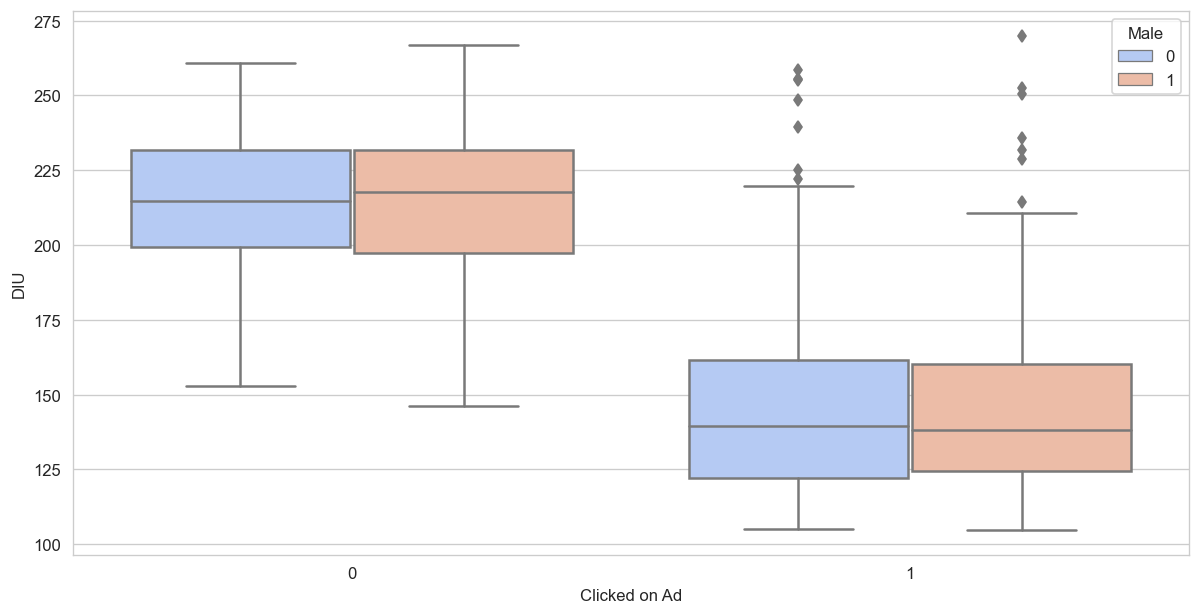

In [10]:
plt.figure(figsize = (12,6),dpi=120)
sns.boxplot(data = data,y='DIU',x='Clicked on Ad', hue='Male',palette = 'coolwarm')
plt.show()

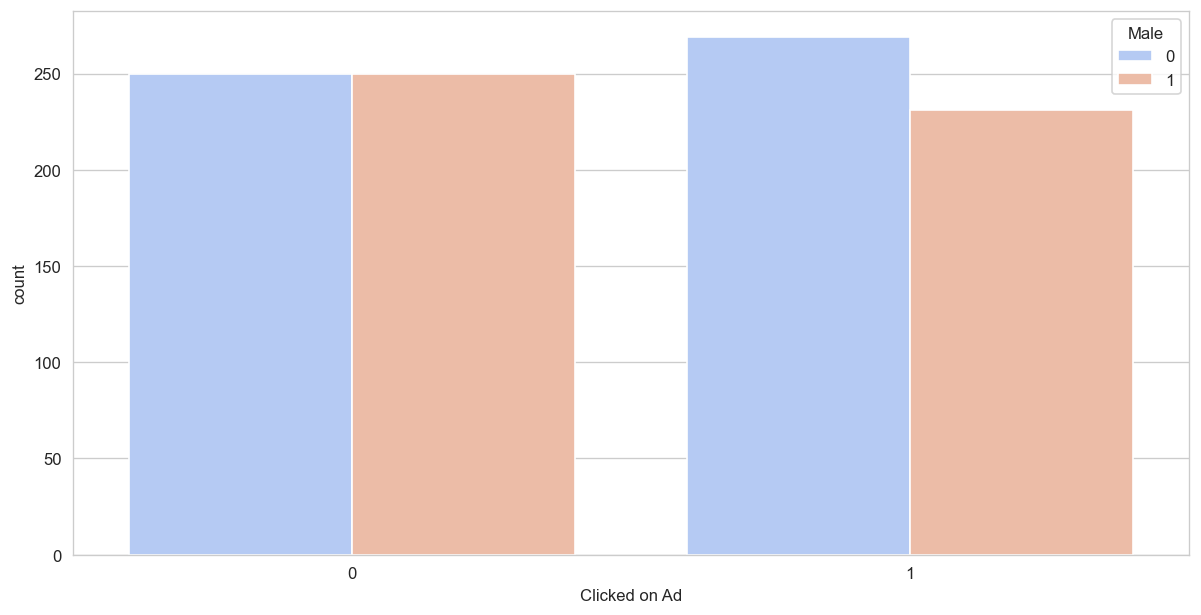

In [11]:
plt.figure(figsize = (12,6),dpi=120)
sns.countplot(data = data,x='Clicked on Ad', hue='Male',palette = 'coolwarm')
plt.show()

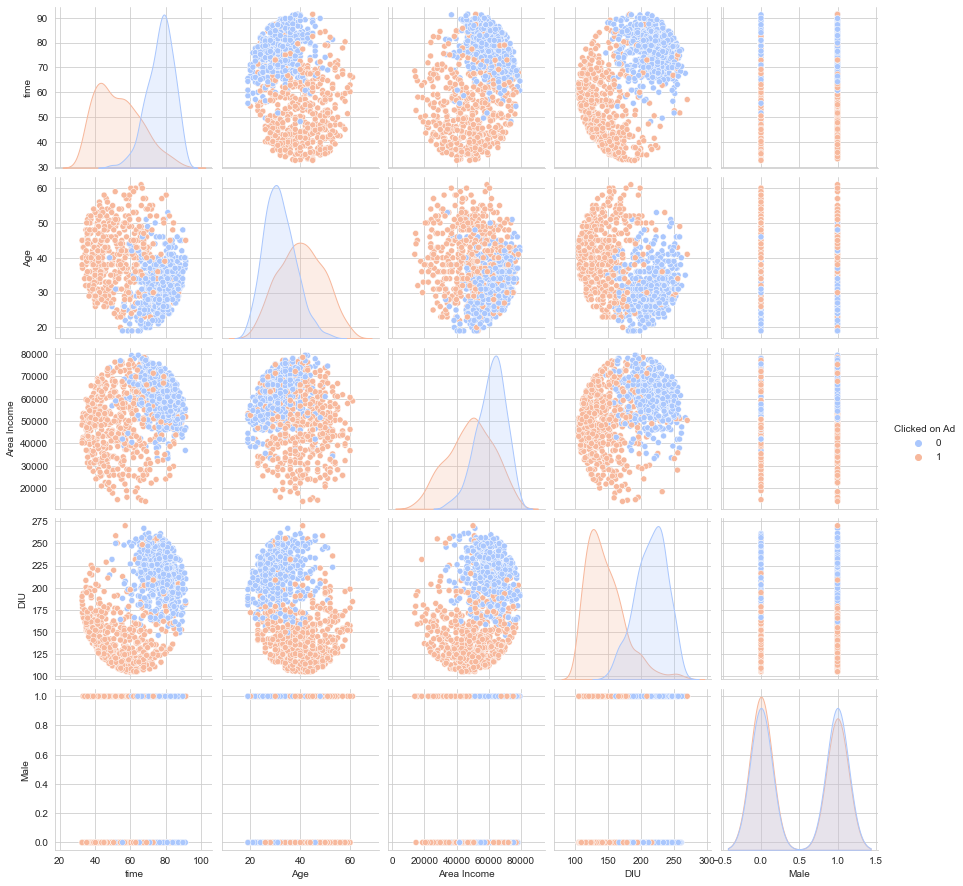

In [12]:
sns.pairplot(data= data,hue = 'Clicked on Ad' ,palette='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
data.drop(['ATL','City','Country','Timestamp'],axis=1,inplace = True)

In [15]:
data.head()

,time,Age,Area Income,DIU,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [16]:
X = data.iloc[:,:-1].values

In [17]:
y = data.iloc[:,-1:].values

In [18]:
y = y.flatten()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
reg = LogisticRegression()

In [30]:
reg.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = reg.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[149   8]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

